# 03 Non-Positional Encodings (Student)

In this worksheet, I'm going to look at how to use shape or size to encode a third variable in scatter plots.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load dataset
df = pd.read_csv('../../Data/fuel-econ.csv')

# create transmission type column
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

## Sampling our data

We have too much data to plot, so let's start by taken a random subsample of data.

In [7]:
# randomly sample data frame
np.random.seed(42)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.loc[sample]

In [8]:
df_subset.shape

(200, 21)

## Encoding with markers

When plotting with `regplot` and `scatter` functions, the `marker` parameter specifies the specific marker to use, but it only takes a string. We'll need a loop to plot multiple figures ontop of one another.

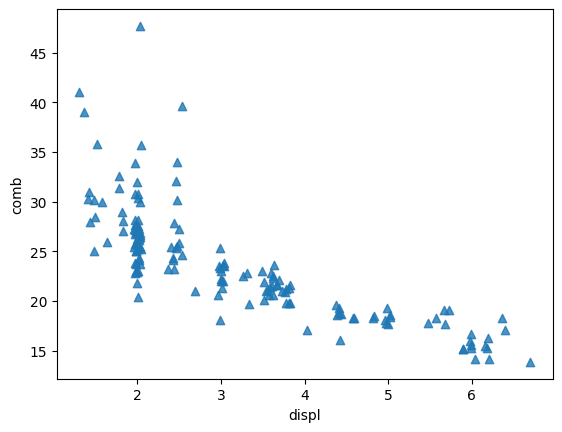

In [9]:
sns.regplot(data=df_subset[df_subset['trans_type'] == 'Automatic'],
            x='displ', y='comb', x_jitter=0.04, fit_reg=False,
            marker='^');

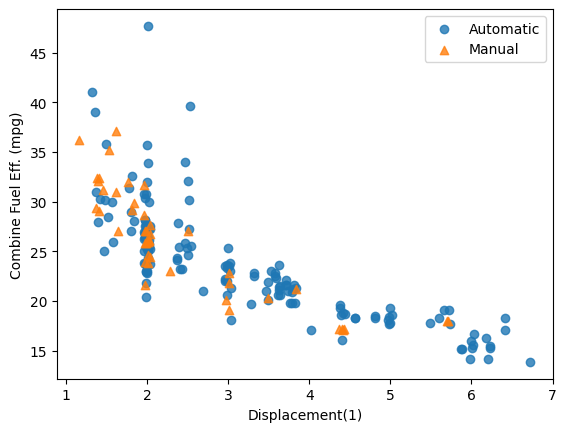

In [10]:
ttype_markers = [['Automatic', 'o'], 
                 ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = df_subset.loc[df_subset['trans_type'] == ttype]
    sns.regplot(data=plot_data, x='displ', y='comb',
                x_jitter=0.04, fit_reg=False, marker=marker);
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

Note that because we sampled our data frame, your plot may look different than the one shown in the video, but the trends should be the same.

For the legend we use Matplotlib's legend function. As an argument to the function, we give a list of labels to place on the legend, one for each regplot call.

## Encoding with marker size

Now let's switch to carbon dioxide emissions as the third variable. Since CO2 is numeric, one encoding we could use is marker size. Higher CO2 emissions would mean a larger circle.

In Matplotlib scatter function, we can set marker size with the S parameter, setting it to the name of the column we want to map it to, CO2. In regplot, we set the parameter as part of a dictionary on the scatter keywords parameter and explicitly assigned it the full series rather than just the column name.

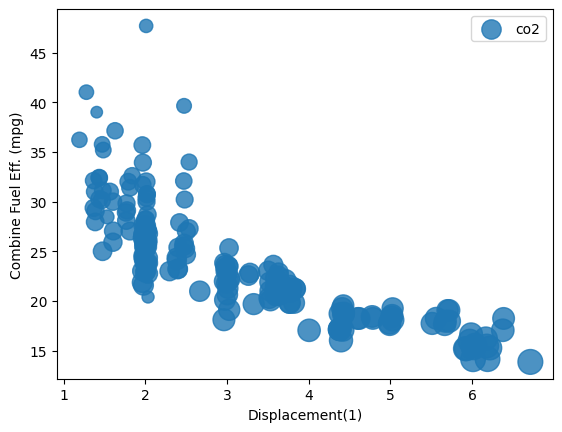

In [11]:
sns.regplot(data=df_subset, x='displ', y='comb', 
           x_jitter=0.04, fit_reg=False, scatter_kws={'s': df_subset['co2']/2},
           label='co2');  # this label parameter is needed to display the legend here
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');
plt.legend();

As engine size increases, there is a higher level of CO2 emissions.

We want to fix that legend, so let's loop over three CO2 values that we want to use for the size legend reference. Inside the loop, use the scatter function to create empty scatter plot objects, and set the necessary point sizes.

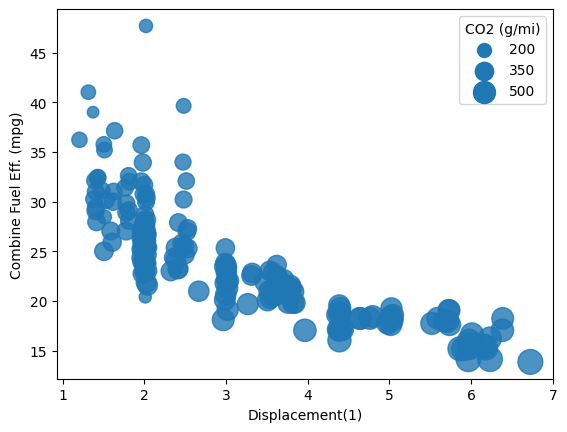

In [12]:
sns.regplot(data=df_subset, x='displ', y='comb', 
           x_jitter=0.04, fit_reg=False, scatter_kws={'s': df_subset['co2']/2});
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

sizes = [200, 350, 500]
legend_obj = []
for s in sizes: 
    legend_obj.append(plt.scatter([], [], s=s/2, color='tab:blue'))
plt.legend(legend_obj, sizes, title='CO2 (g/mi)');